# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [ ]:
import pandas as pd

df = pd.read_csv('SINASC_RO_2019.csv')
df.head()


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [ ]:
def categorizar_apgar5(valor):
    if pd.isnull(valor):
        return 'não informado'
    elif valor <= 3:
        return 'asfixia grave'
    elif valor <= 5:
        return 'asfixia moderada'
    elif valor <= 7:
        return 'asfixia leve'
    elif valor <= 10:
        return 'normal'
    else:
        return 'valor inválido'

df['APGAR5_CATEGORIA'] = df['APGAR5'].apply(categorizar_apgar5)
df['APGAR5_CATEGORIA'].value_counts()


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_grafico = df.dropna(subset=["GESTACAO", "SEXO"])

plt.figure(figsize=(12, 6))
sns.countplot(
    data=df_grafico,
    x="APGAR5_CATEGORIA",
    hue="SEXO",
    order=["asfixia grave", "asfixia moderada", "asfixia leve", "normal"],
    palette="Set2"
)

plt.title("Distribuição de APGAR5 por Sexo - Todos os Tempos de Gestação")
plt.xlabel("Categoria de APGAR5")
plt.ylabel("Número de Nascimentos")
plt.legend(title="Sexo")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [ ]:
tabela_cruzada = pd.crosstab(df['GESTACAO'], df['APGAR5'])
tabela_cruzada


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [ ]:
tabela_percentual = tabela_cruzada.div(tabela_cruzada.sum(axis=1), axis=0) * 100
tabela_percentual.round(2)


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

In [ ]:
tabela_cruzada.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

plt.title('Distribuição de APGAR5 por Tempo de Gestação')
plt.xlabel('Tempo de Gestação')
plt.ylabel('Número de Nascimentos')
plt.legend(title='APGAR5', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

<Figure size 1200x600 with 0 Axes>

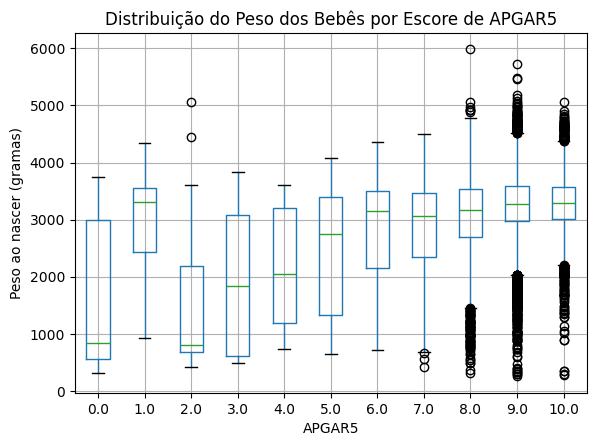

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Usar o nome simplificado do arquivo CSV
df = pd.read_csv('SINASC_RO_2019.csv')

# Remover valores nulos
df_apgar_peso = df[['APGAR5', 'PESO']].dropna()

# Criar gráfico com matplotlib (sem seaborn)
plt.figure(figsize=(12, 6))
df_apgar_peso.boxplot(column='PESO', by='APGAR5', grid=True)
plt.title('Distribuição do Peso dos Bebês por Escore de APGAR5')
plt.suptitle('')  # Remove título extra
plt.xlabel('APGAR5')
plt.ylabel('Peso ao nascer (gramas)')
plt.show()

